# Orbital-scale variability over the last 1.5 Ma

## Authors

Julien Emile-Geay
<a href="https://orcid.org/0000-0001-5920-4751" target="_blank" rel="noopener noreferrer">
  <img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" alt="ORCID iD" style="vertical-align: text-bottom;"/>
</a>

Deborah Khider
<a href="https://orcid.org/0000-0001-7501-8430" target="_blank" rel="noopener noreferrer">
  <img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" alt="ORCID iD" style="vertical-align: text-bottom;"/>
</a>

## Preamble

 [Hodell et al (2023)](https://doi.org/10.5194/cp-19-607-2023) report a continuous millennially resolved record of stable isotopes of planktic and benthic foraminifera at IODP Site U1385 (the “Shackleton Site”) from the southwestern Iberian margin for the last 1.5 million years, which includes the Middle Pleistocene Transition (MPT). Their results "demonstrate that millennial climate variability (MCV) was a persistent feature of glacial climate, both before and after the MPT". The work ties MCV to various features of insolation or deep ocean circulation, which are interesting to revisit in the context of `Pyleoclim`, which permits much more advanced analysis and visualization. 

### Goals

Technical skills involved:

- using the [`pangaeapy` package](https://pypi.org/project/pangaeapy/) to access datasets stored on PANGAEA
- applying and interpreting [spectral analysis](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#psd-pyleoclim-psd) in Pyleoclim
- applying and interpreting [wavelet analysis](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#scalogram-pyleoclim-scalogram) in Pyleoclim
- applying and interpreting [Wavelet Transform Coherency](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#coherence-pyleoclim-coherence) analysis

### Data

This notebook makes use of "Shackleton site" oxygen isotopes records. The main data repository is on [PANGAEA](https://doi.pangaea.de/10.1594/PANGAEA.951401) and contains 9 sub-datasets, some of which we will be analyzing here.

### Reading time
10min

### Keywords
Pyleoclim, Shackleton Site, Spectral Analysis, Wavelet Analysis, Coherence Analysis

Let's import the needed packages:

In [1]:
import pyleoclim as pyleo
from pangaeapy.pandataset import PanDataSet

## Exploratory analysis
### Benthic record

Let's obtain the record from PANGAEA:

In [2]:
# load the dataset
dsb = PanDataSet('10.1594/PANGAEA.951382')
print(dsb.title)
display(dsb.data.head())

Oxgyen and carbon isotope data for benthic foraminifera at IODP Site 339-U1385


,Event,Latitude,Longitude,Sample label,Depth sed,Depth comp,Depth comp r,Depth corr cr,Age,Age_2,...,Age_4,Species,Cibicidoides spp. δ18O,Cibicidoides spp. δ13C,G. affinis δ18O,G. affinis δ13C,Uvigerina spp. δ18O,Uvigerina spp. δ13C,Foram benth δ18O,Elevation
0,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,1-2",0.02,0.02,0.02,0.02,0.13,0.12,...,0.14,Cibicidoides wuellerstorfi,2.57,0.98,NaN,NaN,2.90,-0.42,3.21,-2584.0
1,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,20-21",0.21,0.21,0.21,0.21,1.37,1.22,...,1.46,Cibicidoides wuellerstorfi,2.77,1.20,NaN,NaN,NaN,NaN,3.41,-2584.0
2,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,21-22",0.22,0.22,0.22,0.22,1.44,1.28,...,1.53,Uvigerina spp.,NaN,NaN,NaN,NaN,3.37,0.04,3.37,-2584.0
3,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,40-41",0.41,0.41,0.41,0.41,2.66,2.39,...,2.85,Cibicidoides wuellerstorfi,2.77,1.16,NaN,NaN,NaN,NaN,3.41,-2584.0
4,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,41-42",0.42,0.42,0.42,0.42,2.72,2.44,...,2.92,Cibicidoides wuellerstorfi,2.59,0.95,NaN,NaN,NaN,NaN,3.23,-2584.0


Let's have a look at the information stored in each column:

In [3]:
dsb.data.columns

Index(['Event', 'Latitude', 'Longitude', 'Sample label', 'Depth sed',
       'Depth comp', 'Depth comp r', 'Depth corr cr', 'Age', 'Age_2', 'Age_3',
       'Age_4', 'Species', 'Cibicidoides spp. δ18O', 'Cibicidoides spp. δ13C',
       'G. affinis δ18O', 'G. affinis δ13C', 'Uvigerina spp. δ18O',
       'Uvigerina spp. δ13C', 'Foram benth δ18O', 'Elevation'],
      dtype='object')

In [14]:
dsb.data['Foram benth δ18O']

0       3.21
1       3.41
2       3.37
3       3.41
4       3.23
        ... 
8246    3.51
8247    3.48
8248    3.48
8249    3.33
8250    3.26
Name: Foram benth δ18O, Length: 8251, dtype: float64

Let's create a [`GeoSeries` object](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#geoseries-pyleoclim-geoseries). This object holds additional metadata compared to its `Series` parent, allowing for better visualizations. Since `GeoSeries` is a subclass of `Series`, all the methods available in `Series` are applicable to `GeoSeries`.

One of these methods is the dashboard which plots the time series, maps the location of the archive and performs spectral analysis. We will be using the dashboard method here as an example. For speed, the timeseries was interpolated to run spectral analysis with the MTM method.

<div style="
    padding: 10px; 
    background-color: #fff3cd; 
    border-left: 6px solid #ffcc00; 
    margin: 10px 0;">
    <strong>Warning:</strong> On a Mac, this cell may take up to 30 min to run if you choose the default method for spectral analysis
</div>

Time axis values sorted in ascending order


Performing spectral analysis on individual series: 100%|██████████| 200/200 [00:04<00:00, 44.60it/s] 


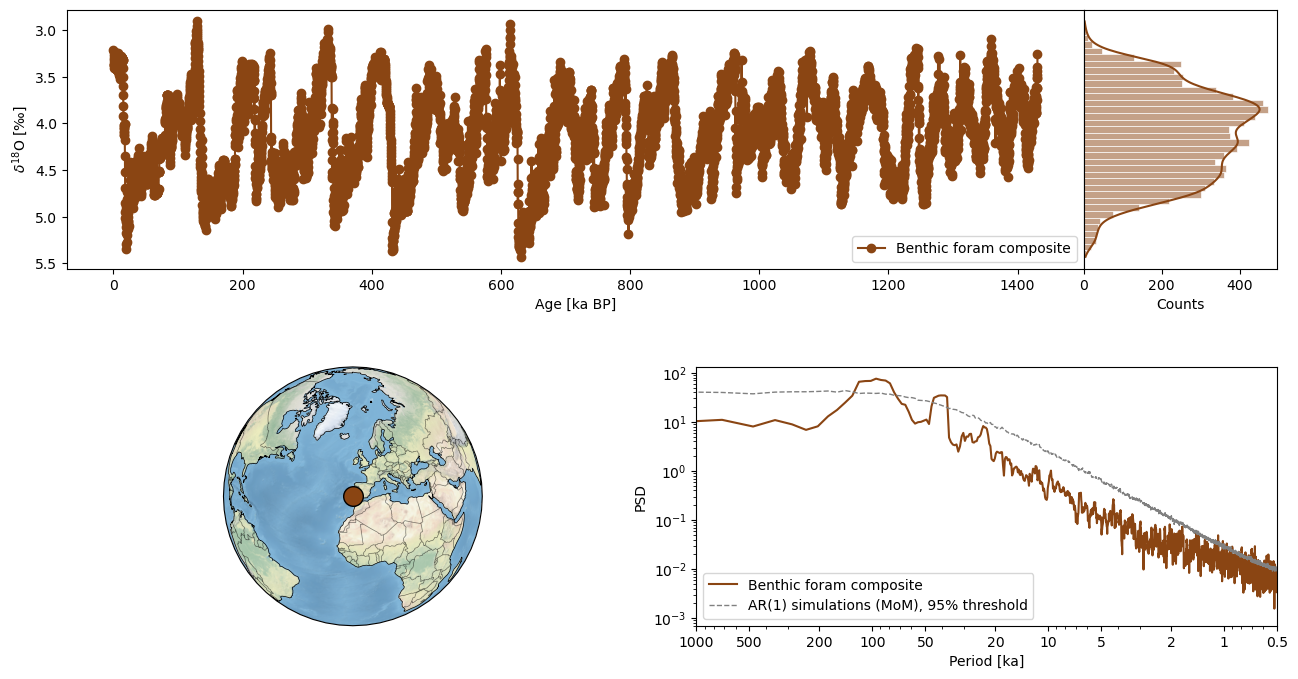

In [17]:
tsb = pyleo.GeoSeries(time=dsb.data['Age'], value=dsb.data['Foram benth δ18O'],
                      lat = dsb.data['Latitude'].iloc[0], lon = dsb.data['Longitude'].iloc[0],
                      elevation = dsb.data['Elevation'].iloc[0], archiveType = 'MarineSediment', 
                      time_name='Age', time_unit='ka BP', label = 'Benthic foram composite',
                      value_name='$\delta^{18}$O', value_unit=u'‰')
fig,ax = tsb.interp().dashboard(spectral_kwargs={'method':'mtm'}, plt_kwargs={'invert_yaxis':True})

<div style="
    padding: 10px; 
    background-color: #e7f3fe; 
    border-left: 6px solid #2196F3; 
    margin-bottom: 15px;">
  <strong>Note:</strong> The chronology used in this paper is a hybrid model constructed using a combination of age–depth points from MD01-2444 and U1385. The age model is accurate to a precession cycle (∼ 23 kyr) but cannot provide exact absolute or relative dates for millennial events. This shortcoming limits the reliability of suborbital spectral peaks and estimation of recurrence times of millennial events. Nonetheless, the relative phasing of signals recording different components of the ocean–atmosphere system can be determined stratigraphically without the need for a timescale that is accurate at suborbital resolution. This is particularly important for inferring the phase relationship between planktic and benthic δ18O, which reflects the interhemispheric leads and lags of the two polar regions.
</div>

We see obliquity and eccentricity periods throughout the record, as expected. 

You can also plot the timeseries with its appropriate geological era as such:

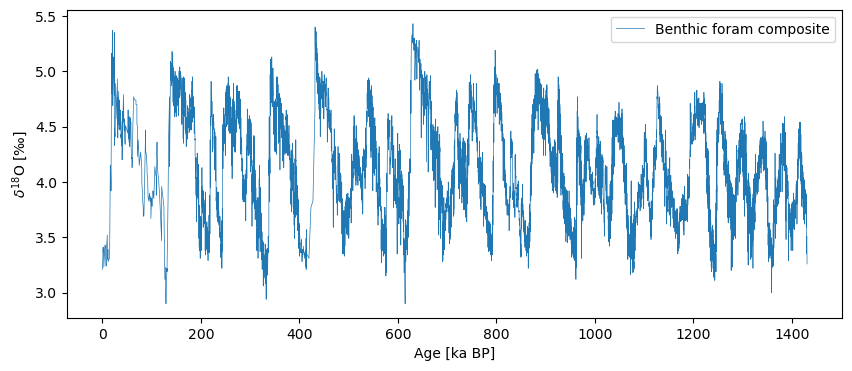

In [18]:
fig, ax = tsb.plot(figsize=(10, 4),linewidth=0.5)
#ax.invert_yaxis() # d18O is traditionally inverted
#fig, ax = pyleo.add_GTS(fig, ax, ranks=['Period', 'Epoch'], location='above')

### Planktonic record

The planktonic record is also available [on PANGAEA](https://doi.pangaea.de/10.1594/PANGAEA.951386).

In [19]:
dsp = PanDataSet('10.1594/PANGAEA.951386')
print(dsp.title)
print(dsp.data.head())

Oxgyen and carbon isotope data for the planktonic foraminifera Globigerina bulloides at IODP Site 339-U1385
        Event  Latitude  Longitude           Sample label  Depth sed  \
0  339-U1385D   37.5713   -10.1259    339-U1385D-1H-1,0-1       0.01   
1  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,20-21       0.21   
2  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,40-41       0.41   
3  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,60-61       0.61   
4  339-U1385D   37.5713   -10.1259  339-U1385D-1H-1,80-81       0.81   

   Depth comp  Depth comp r  Depth corr cr   Age  Age_2  Age_3  Age_4  \
0        0.01          0.01           0.01  0.07   0.06   0.06   0.07   
1        0.21          0.21           0.21  1.37   1.22   1.22   1.46   
2        0.41          0.41           0.41  2.66   2.39   2.39   2.85   
3        0.61          0.61           0.61  3.86   3.55   3.55   4.24   
4        0.81          0.81           0.81  5.06   4.71   4.71   5.63   

   G. bulloides δ18O

NaNs have been detected and dropped.
Time axis values sorted in ascending order


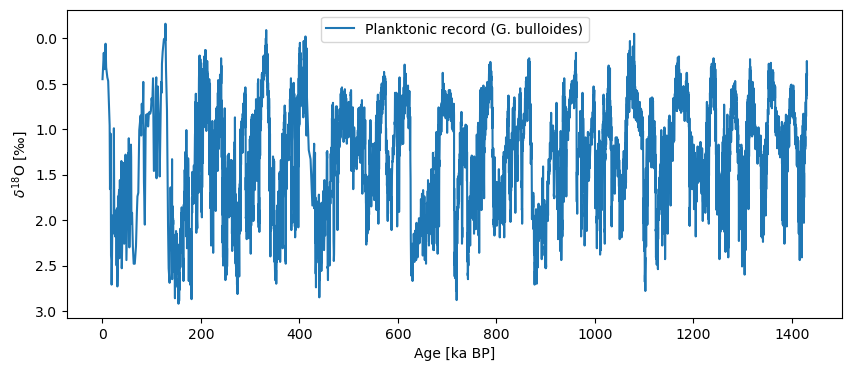

In [20]:
tsp = pyleo.GeoSeries(time=dsp.data['Age'], value=dsp.data['G. bulloides δ18O'],
                      lat = dsp.data['Latitude'].iloc[0], lon = dsp.data['Longitude'].iloc[0],
                      elevation = dsb.data['Elevation'].iloc[0], archiveType = 'MarineSediment', 
                      time_name='Age', time_unit='ka BP', label = 'Planktonic record (G. bulloides)',
                      value_name='$\delta^{18}$O', value_unit=u'‰')
fig, ax = tsp.plot(invert_yaxis=True)

Let's plot the planktonic and benthic data together. To do so, you can create a [`MultipleGeoSeries` object](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multiplegeoseries-pyleoclim-multiplegeoseries) and use the [`stackplot` function](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.stackplot):

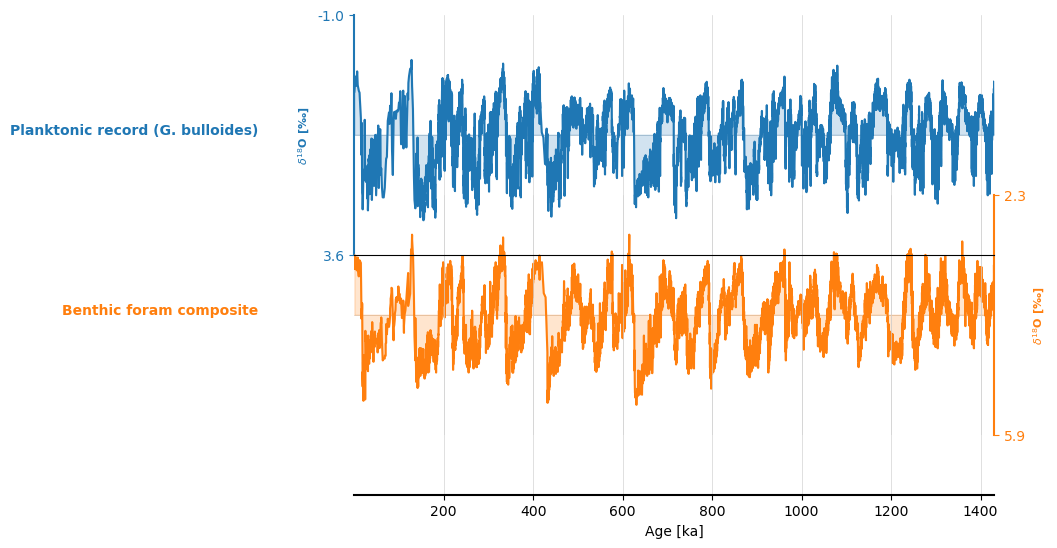

In [24]:
ms = tsp & tsb
fig, ax = ms.stackplot()
ax[0].invert_yaxis()
ax[1].invert_yaxis()

DescribeResult(nobs=8100, minmax=(0.0, 3.660000000000025), mean=0.1766456790123457, variance=0.035434666390760095, skewness=8.636534814144614, kurtosis=110.7583996695836)

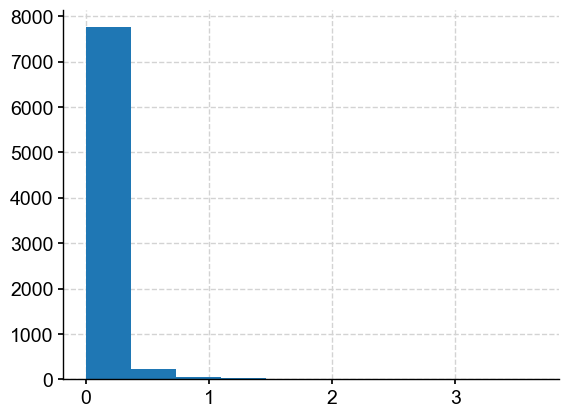

In [25]:
res, stats , sign =  pyleo.utils.tsbase.resolution(tsp.time)
import matplotlib.pyplot as plt
plt.hist(res)
stats

The data are unenvely spaced, so we need to use WWZ to analyze it.

In [20]:
coh = tsp.wavelet_coherence(tsb,method='wwz')

In [26]:
coh_sig = coh.signif_test(number=100)

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis v

Performing wavelet coherence on surrogate pairs: 100%|██████████| 100/100 [33:52<00:00, 20.33s/it]


(<Figure size 900x1200 with 6 Axes>,
 {'ts1': <AxesSubplot: ylabel='$\\delta^{18}$O x (-1) [‰]'>,
  'ts2': <AxesSubplot: xlabel='Age [ka BP]', ylabel='$\\delta^{18}$O x (-1) [‰]'>,
  'wtc': <AxesSubplot: ylabel='Scale [kyrs]'>,
  'xwt': <AxesSubplot: xlabel='Age [ka BP]', ylabel='Scale [kyrs]'>})

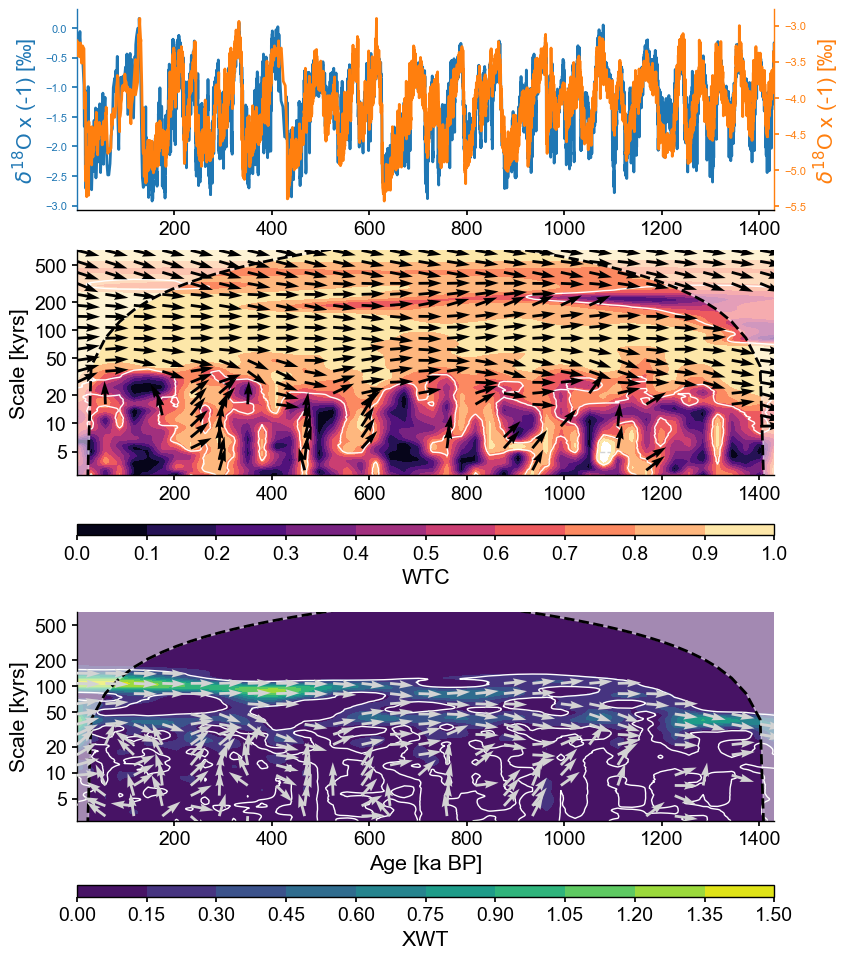

In [27]:
coh_sig.dashboard()

Huzzah! Very coherent signals at orbital scales, but phase quadrature can be observed at shorter scales

## Illustrating some key conclusions with pyleoclim tools

Hodell et al (2023) state : _"The [...] record suggests that bipolar asymmetry was a robust feature of interhemispheric glacial climate variations for at least the past 1.5 Ma despite chang- ing glacial boundary conditions. A strong correlation exists between millennial increases in planktic δ18O (cooling) and decreases in benthic δ13C, indicating that millennial varia- tions in North Atlantic surface temperature are mirrored by changes in deep-water circulation and remineralization of carbon in the abyssal ocean. We find strong evidence that climate variability on millennial and orbital scales is coupled across different timescales and interacts in both directions, which may be important for linking internal climate dynamics and external astronomical forcing. "_

This can be tested in a variety of ways:
- pyEDM
- wavelet coherence (with carbon isotopes)

## Comparison to insolation

[climlab](https://climlab.readthedocs.io/en/latest/index.html) by Brian Rose does many great things. One of them is to compute insolation curves. First, we need to figure out which insolation to use. THe paper doesn't say...  

In [ ]:
from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation
import numpy as np

kyears = np.linspace(-400, 0, 1001 ) # specify time interval and units
orb = OrbitalTable.interp(kyear=kyears) # subset of orbital parameters for specified time
days = np.linspace(0, const.days_per_year, 365)

Qsb = daily_insolation(lat_sb, days, orb) # generate insolation  at Sanbao latitude
Qsb_jja = np.mean(Qsb[:,151:243], axis=1)  # Julian days 152-243 are JJA